# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Jeremy Ethan
- Email: jeremyethan21@gmail.com
- Id Dicoding: jeremyethann

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# Read csv
student_performance_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv",
    delimiter=';'
)
pd.set_option('display.max_columns', None)
print(student_performance_df.head(5))


   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

In [3]:
#Check if there is null data, there is no null data
student_performance_df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [4]:
# see the dtype of each column, there is no issue
student_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# See if there is any weird data, no issue
student_performance_df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


## Data Preparation / Preprocessing

In [6]:
# Make function for numerical plot and getting numerical features
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(8, 5 * len(features)))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(segment_feature, fontsize=12)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
        ax[i].set_xlabel(feature, fontsize=12)
        ax[i].tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()

def get_numerical_features(df):
    return df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

In [7]:
# Make function for categorical plot and getting categorical features
def categorical_plot(features, df, segment_feature=None):
    # Determine the number of rows for subplots
    n_features = len(features)
    fig_height = max(5, n_features * 3)  # Adjusting height based on the number of features

    fig, ax = plt.subplots(n_features, 1, figsize=(10, fig_height))
    
    # Ensure ax is always a list even if there's only one subplot
    if n_features == 1:
        ax = [ax]

    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
        ax[i].set_xlabel(feature, fontsize=12)
        ax[i].tick_params(axis='both', which='major', labelsize=10)

    plt.tight_layout()
    plt.show()
    
def get_categorical_features(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

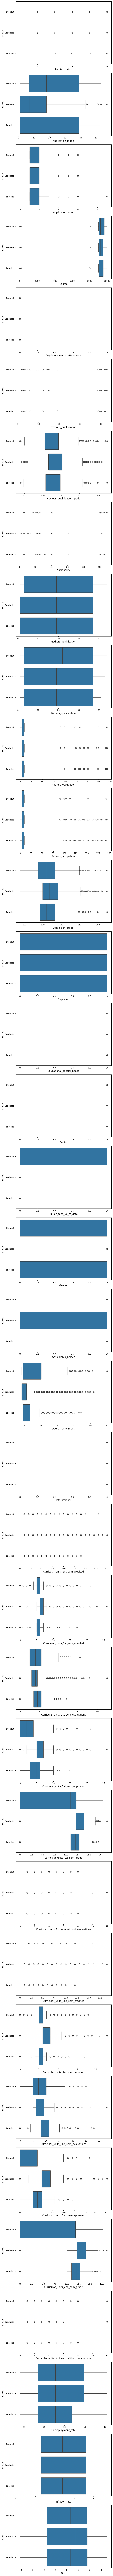

In [8]:
# To see which numerical column that correlate with status
numerical_dis_plot(
    features=get_numerical_features(student_performance_df),
    df=student_performance_df, 
    segment_feature="Status"
)

In [9]:
# Change the numerical column to categorical for checking
int64_columns = student_performance_df.select_dtypes(include=['int64']).columns
student_performance_categorical = student_performance_df.copy()
student_performance_categorical[int64_columns] = student_performance_df[int64_columns].astype('object')
student_performance_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

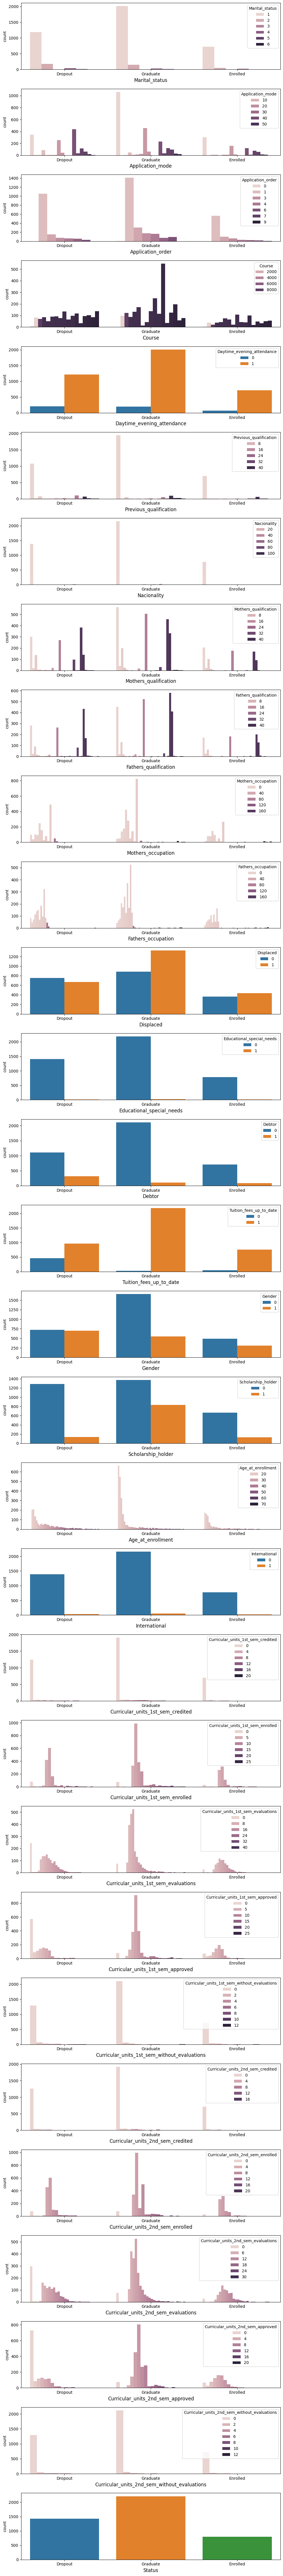

In [10]:
# To see which categorical column that correlate with status
categorical_plot(
    features=get_categorical_features(student_performance_categorical),
    df=student_performance_categorical,
    segment_feature="Status"
)

### Final Hypothesis

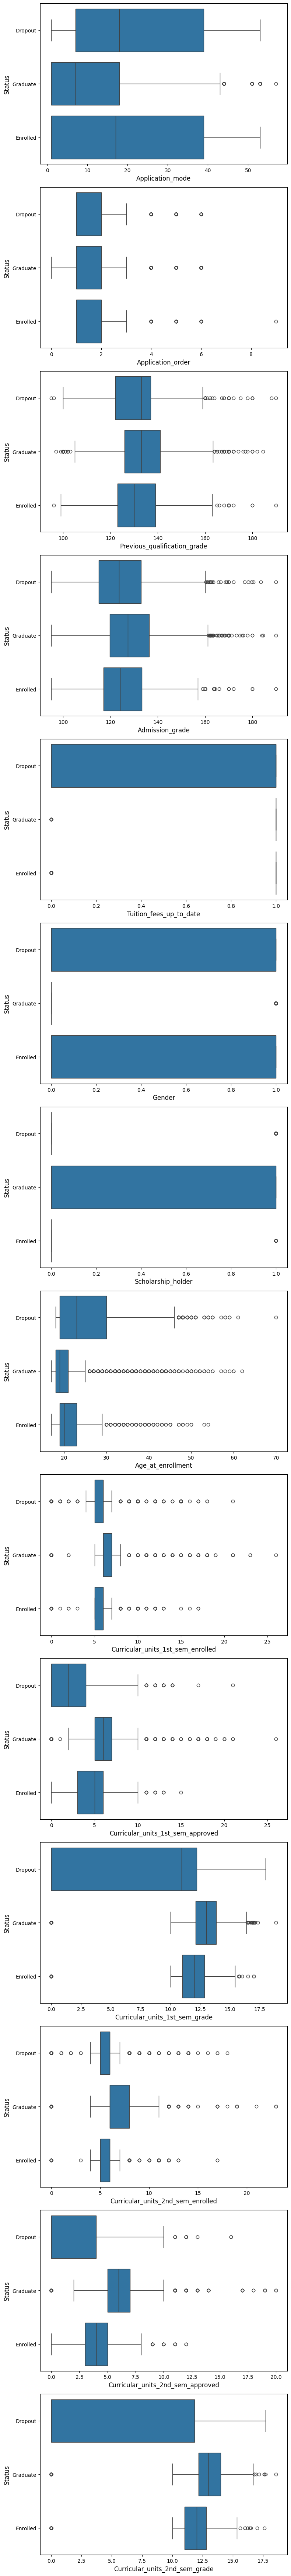

In [11]:
# Final hypothesis that these columns impacting the Student Performance
numerical_dis_plot(
    features=['Application_mode', 'Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'],
    df=student_performance_df, 
    segment_feature="Status"
)

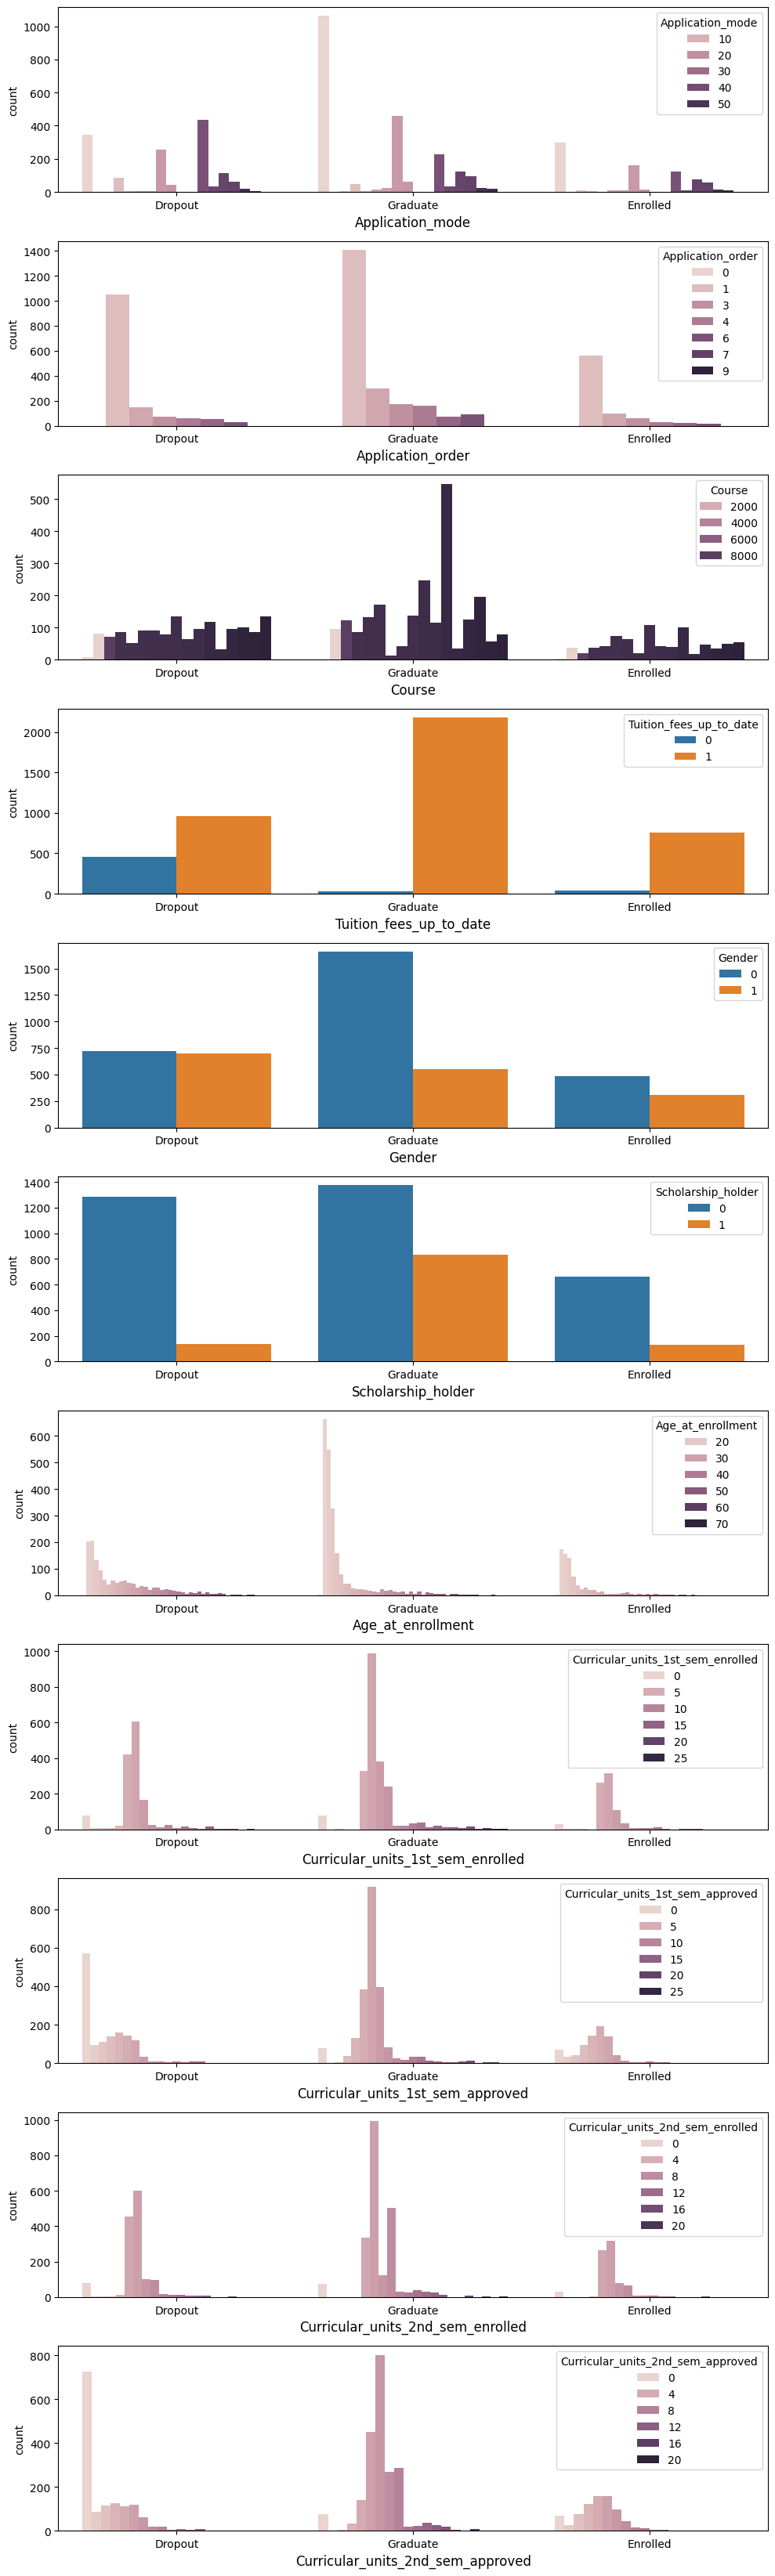

In [12]:
categorical_plot(
    features= ['Application_mode', 'Application_order', 'Course', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved'],
    df=student_performance_categorical, 
    segment_feature="Status"
)

<Axes: >

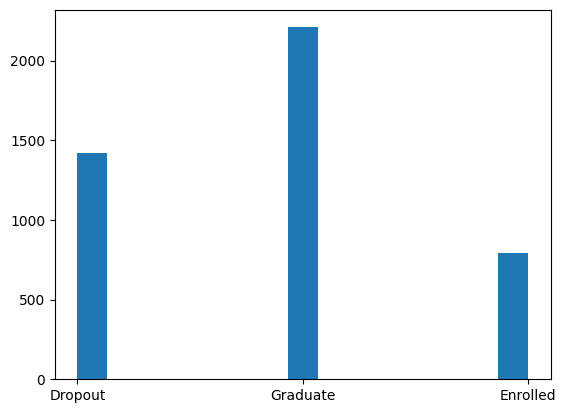

In [13]:
# We can see that the number of data of graduate is higher than dropout, so need to stratify or undersampling for machine learning model
student_performance_df["Status"].hist(bins=15, grid=False)

# Modeling

In [14]:
# Make model with the most influence columns to status
features=['Application_mode', 'Application_order', 'Course', 'Previous_qualification_grade', 'Admission_grade', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Status']
machine_learning_df = student_performance_df[features]
# Read only Graduate & Dropout data
train_machine_learning_df = machine_learning_df[machine_learning_df['Status'].isin(['Graduate','Dropout'])]
test_machine_learning_df = machine_learning_df[machine_learning_df['Status']=='Enrolled']

In [15]:
test_machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 16 to 4413
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_mode                   794 non-null    int64  
 1   Application_order                  794 non-null    int64  
 2   Course                             794 non-null    int64  
 3   Previous_qualification_grade       794 non-null    float64
 4   Admission_grade                    794 non-null    float64
 5   Tuition_fees_up_to_date            794 non-null    int64  
 6   Gender                             794 non-null    int64  
 7   Scholarship_holder                 794 non-null    int64  
 8   Age_at_enrollment                  794 non-null    int64  
 9   Curricular_units_1st_sem_enrolled  794 non-null    int64  
 10  Curricular_units_1st_sem_approved  794 non-null    int64  
 11  Curricular_units_1st_sem_grade     794 non-null    float64
 1

### Undersampling for machine learning

In [16]:
# Resampling to 1421 because Graduate is over than Dropout
train_machine_learning_df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [17]:
# Doing the undersampling
df_majority = train_machine_learning_df[(train_machine_learning_df.Status == "Graduate")]
df_minority = train_machine_learning_df[(train_machine_learning_df.Status == "Dropout")] 
df_majority_undersampled = resample(df_majority, n_samples=1421, random_state=365)
print(df_majority_undersampled.shape)
print(df_minority.shape)
undersampled_train_df = pd.concat([df_minority, df_majority_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=365)
undersampled_train_df.reset_index(drop=True, inplace=True)

(1421, 16)
(1421, 16)


### Train Test Split

In [18]:
# Making target and inputs variable
target=undersampled_train_df['Status']
inputs=undersampled_train_df.drop(['Status'],axis=1)

In [19]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365, stratify=target)

In [20]:
y_train.value_counts()

Status
Graduate    1137
Dropout     1136
Name: count, dtype: int64

In [21]:
y_test.value_counts()

Status
Dropout     285
Graduate    284
Name: count, dtype: int64

### Encoding & Scaling

In [22]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

In [23]:
new_train_df, new_test_df = scaling(inputs.columns, X_train, X_test)

In [24]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

### Model

In [25]:
# Making the random forest model
clf = RandomForestClassifier(random_state=365)
param_grid = { 
    'n_estimators': [10, 20, 50, 100, 200, 250, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
CV_clf.fit(new_train_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=365),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 200, 250, 500,
                                          1000]})

In [26]:
# Finding the best parameter
print("best parameters: ", CV_clf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}


## Evaluation

In [27]:
clf = RandomForestClassifier(random_state=365, criterion= 'entropy', max_depth= 9, max_features= 'sqrt', n_estimators= 200)
clf.fit(new_train_df, new_y_train)

# Evaluate the model
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels = np.unique(np.concatenate([y_true, y_pred]))
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

              precision    recall  f1-score   support

     Dropout       0.95      0.87      0.91       285
    Graduate       0.88      0.95      0.91       284

    accuracy                           0.91       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.91      0.91      0.91       569



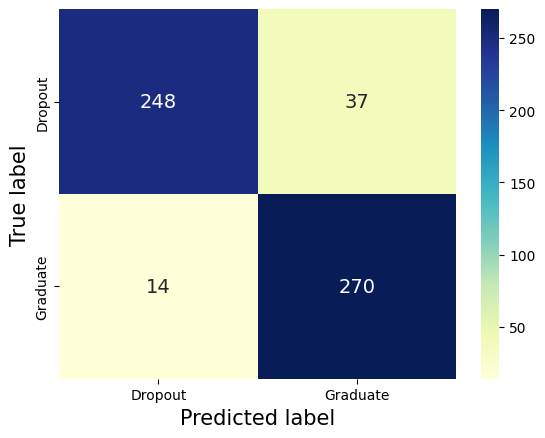

,Dropout,Graduate
Dropout,248,37
Graduate,14,270


In [28]:
y_pred_test = clf.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_test)

##### The model already has a good accuracy score of 91%

### Make our own prediction

In [29]:
X_test.columns.to_list()

['Application_mode',
 'Application_order',
 'Course',
 'Previous_qualification_grade',
 'Admission_grade',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade']

In [30]:
employee_testing_df = test_machine_learning_df
employee_testing_df.head()

,Application_mode,Application_order,Course,Previous_qualification_grade,Admission_grade,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
16,18,1,9238,137.0,137.4,1,0,0,18,6,1,12.000000,6,2,11.000,Enrolled
19,1,1,9853,140.0,124.6,1,0,0,18,7,6,11.666667,7,6,13.500,Enrolled
21,18,4,9556,127.0,121.8,1,0,0,20,7,7,11.437500,8,8,11.425,Enrolled
25,1,1,9238,151.0,157.0,1,0,1,18,6,5,11.600000,6,4,11.000,Enrolled
27,1,1,9085,138.0,131.0,1,0,0,18,5,5,12.666667,5,4,13.000,Enrolled


In [31]:
# We can use the model to predict current employee that is still and the company and no data about the attrition
X_testing_df = employee_testing_df.drop(['Status'],axis=1)
encoder.inverse_transform(clf.predict(X_testing_df))

array(['Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
      

In [32]:
# Deploy
joblib.dump(clf, 'random_forest_model.joblib')

['random_forest_model.joblib']